# Classifying Cats and Dogs using CNN and Transfer Learning
> We'll build a model to try and identify whether images contain a dog or a cat. The dataset contains 25,000 images of cats and dogs



---
## Installing Package

In [1]:
!pip install matplotlib
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install opencv-python
!pip install scikit-learn

---
## Explore the Data
We will first download the dataset using the code block below. The data also needs to be split into a training and testing set.  
The code block below downloads the full Cats-v-Dogs dataset and stores it as `cats-and-dogs.zip`. It then will unzip the file, which will create a `PetImages` directory containing subdirectories called `Cat` and `Dog`.

In [82]:
# Import  libraries

import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import cv2
import random
from shutil import copyfile

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
# from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

import os
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')

In [3]:
# Extract zip file - kagglecatsanddogs_5340.zip
_URL = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

zip_dir

'C:\\Users\\Dazai\\.keras\\datasets\\cats_and_dogs.zip'

Deleting all non-image files

In [83]:
print(f"There are {len(os.listdir('PetImages/Cat'))} Cat images.")
print(f"There are {len(os.listdir('PetImages/Dog'))} Dog images.")

There are 12501 Cat images.
There are 12501 Dog images.


## Check for Images

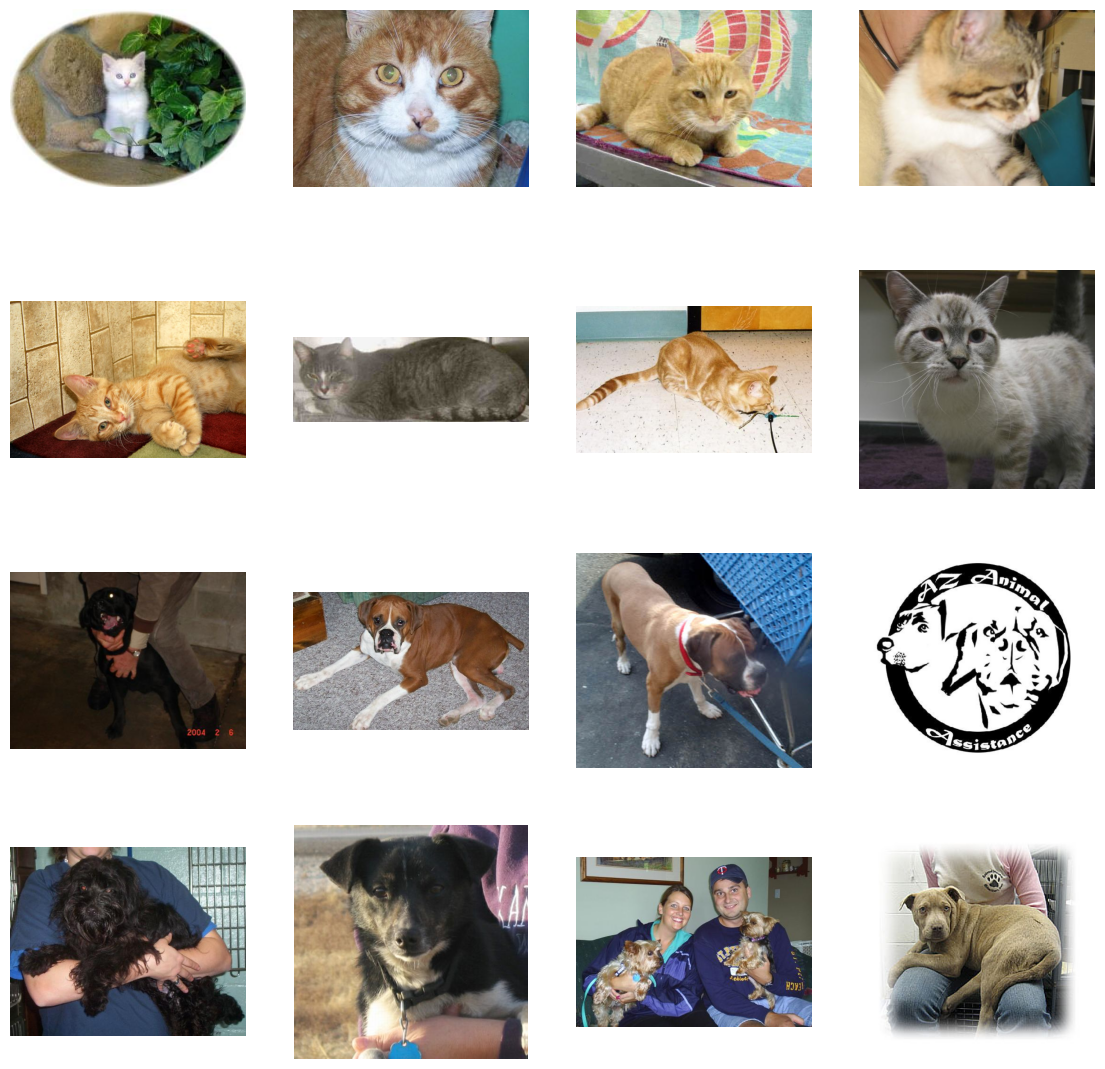

In [84]:
fig = plt.gcf()
fig.set_size_inches(14, 14)

cat_dir = os.path.join('PetImages/Cat')
dog_dir = os.path.join('PetImages/Dog')
cats = os.listdir(cat_dir)
dogs = os.listdir(dog_dir)

pic_index = 220

cat_pictures = [os.path.join(cat_dir, fname)
              for fname in cats[pic_index-8:pic_index]]
dog_pictures = [os.path.join(dog_dir, fname)
              for fname in dogs[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_pictures + dog_pictures):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


#Create directories.
We'll use `os.mkdir` to create your subdirectories for `training` and `testing`. These in turn will need subdirectories for `cats` and `dogs`.

In [86]:
root_path = 'PetImages'

train_dir = os.path.join(root_path, 'training')
os.makedirs(train_dir, 493 )
validation_dir = os.path.join(root_path, 'testing')
os.makedirs(validation_dir, 493)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, 493)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, 493)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, 493)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, 493)

We will write a Python function called `split_data` which takes a `SOURCE` directory containing the files, `TRAINING` and `TESTING` directories that a portion of the files will be copied to, and a `SPLIT_SIZE` to determine the portion of the split.  
The files should also be randomized, so that the training set is a random X% of the files, and the test set is the reamining files.  
Also, all images should be checked, and if they have a zero files length, they will not be copied over.

`os.listdir(DIRECTORY)` gives you a listing of the contents of that directory.  

`os.path.getsize(PATH)` gives you the size of the file.  

`copyfile(source, destination)` copies a file from source to destination.  

`random.sample(list, len(list))` shuffles a list.

In [87]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []

    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))

    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)

    shuffled = random.sample(all_files, n_files)

    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]

    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)

    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)


CAT_SOURCE_DIR = "PetImages/Cat/"
TRAINING_CATS_DIR = "PetImages/training/cats/"
TESTING_CATS_DIR = "PetImages/testing/cats/"
DOG_SOURCE_DIR = "PetImages/Dog/"
TRAINING_DOGS_DIR = "PetImages/training/dogs/"
TESTING_DOGS_DIR = "PetImages/testing/dogs/"

split_size = .8
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [88]:
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for validation")



Original cat's directory has 12501 images
Original dog's directory has 12501 images

There are 10000 images of cats for training
There are 10000 images of dogs for training
There are 2500 images of cats for validation
There are 2500 images of dogs for validation


There are 9999 images each in the training set of the cats and dogs directories.  
There are 2500 images each in the test set of the cats and dogs directories.

Let's see what the file names look like in the cats and dogs training directories. We will see that there are no labels in the dataset.

In [89]:
train_cat_fnames = os.listdir('PetImages/training/cats/')
train_dog_fnames = os.listdir('PetImages/training/dogs/')

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10004.jpg', '10005.jpg', '10006.jpg']
['0.jpg', '1.jpg', '100.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg']


---
## Building a model (Convolutional Neural Network)
We'll define a Sequential layer and add some convolutional layers. The input shape parameter will be 150 X 150 for the size and 3 (bytes) for the color depth.  
We then add a few convolutional and pooling layers, and flatten the final result to feed into the densely connected layers.  
Next, we'll configure the specifications for model training. We'll train our model with the binary_crossentropy loss because it's a binary classification problem and our final activation is a sigmoid, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0). We'll use the rmsprop optimizer with a learning rate of 0.001. During training, we will monitor the classification accuracy.

In [90]:
sequential_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The `sequential_model.summary()` method prints a summary of the neural network.

In [91]:
sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_380 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_381 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_382 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 17, 17, 128)      

Total params: 3453121 (13.17 MB)
Trainable params: 3453121 (13.17 MB)
Non-trainable params: 0 (0.00 Byte)

---
## Data Preprocessing

Let's set up the data generators that will read the pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150 X 150 and their labels (binary).  
We will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).  
In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows us to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [92]:
TRAINING_DIR = 'PetImages/training'
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = 'PetImages/testing'
validation_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

Found 19999 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


Considering time and GPU constraints, we will only be training the dataset for 20 epochs.

In [93]:
#collapse-output
history = sequential_model.fit(train_generator,
                    steps_per_epoch=50,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)


Epoch 1/20
50/50 [==============================] - 93s 2s/step - loss: 0.6951 - accuracy: 0.5084 - val_loss: 0.6863 - val_accuracy: 0.5583
Epoch 2/20
50/50 [==============================] - 66s 1s/step - loss: 0.6665 - accuracy: 0.5888 - val_loss: 0.7078 - val_accuracy: 0.5335
Epoch 3/20
50/50 [==============================] - 65s 1s/step - loss: 0.6688 - accuracy: 0.5834 - val_loss: 0.6743 - val_accuracy: 0.5905
Epoch 4/20
50/50 [==============================] - 63s 1s/step - loss: 0.6711 - accuracy: 0.5944 - val_loss: 0.6628 - val_accuracy: 0.5839
Epoch 5/20
50/50 [==============================] - 63s 1s/step - loss: 0.6648 - accuracy: 0.5924 - val_loss: 0.6523 - val_accuracy: 0.5953
Epoch 6/20
50/50 [==============================] - 61s 1s/step - loss: 0.6482 - accuracy: 0.6243 - val_loss: 0.6470 - val_accuracy: 0.6203
Epoch 7/20
50/50 [==============================] - 61s 1s/step - loss: 0.6301 - accuracy: 0.6363 - val_loss: 0.6200 - val_accuracy: 0.6561
Epoch 8/20
50/50 [==

We can see four values per epoch - *loss*, *accuracy*, *validation loss* and *validation accuracy*.  
The *loss* and *accuracy* are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. The *accuracy* is the portion of correct guesses. The *validation accuracy* is the measurement with the data that has not been used in training. As expected, this would be a bit lower.

After 20 epochs, the *training loss* = 0.5186 and *training accuracy* = 0.7357. The *validation loss* = 0.5578 and *validation accuracy* = 0.7191.

---
## Evaluating accuracy and loss for the model
Let's plot the training/validation accuracy and loss, during training.

Text(0.5, 1.0, 'Training and validation loss')

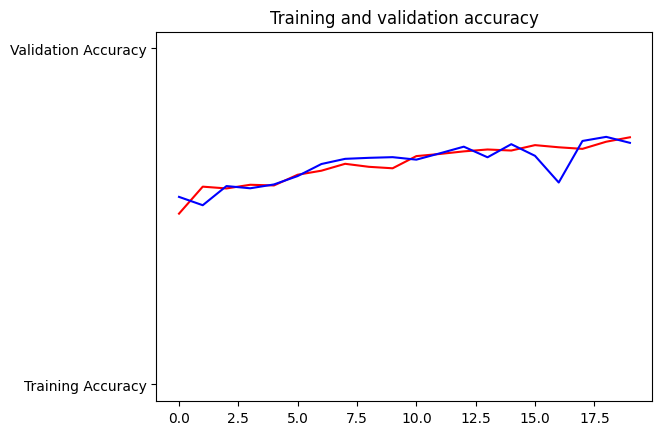

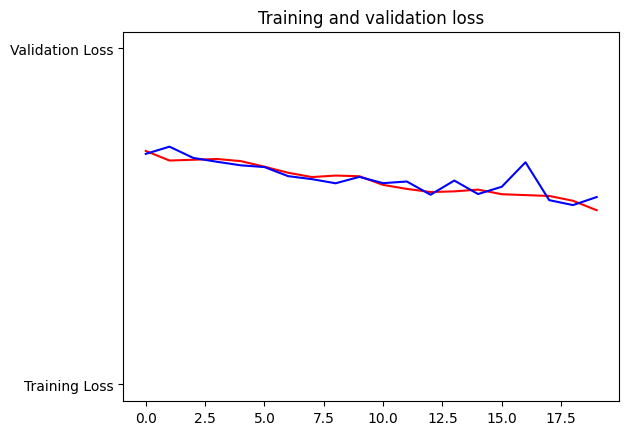

In [94]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

The graphs suggest that the validation accuracy is seen rising synchronously with the training accuracy. The validation loss is decreasing synchronously with the training accuracy.  
However, the validation accuracy and validation loss lines are wavy and are not smooth like the training lines.  
Let's see how the model performs after applying transfer learning.

---
## Transfer Learning
In Transfer Learning, we take an existing model that's trained on far more data, and use the features that that model learned.  
We'll be using the keras `layers` API, to pick at the layers, and to understand which ones we want to use, and which ones we want to retrain. Keras has the model definition built-in. It's the parameters that can then get loaded into the skeleton of the model, to turn it back into a trained model. So now if we want to use Inception, it's fortunate that keras has the model definition built in.

In [95]:
from tensorflow.keras import layers
from tensorflow.keras import Model


from tensorflow.keras.applications.inception_v3 import InceptionV3

The inception V3 has a fully-connected layer at the top. So by setting `include_top=false`, we're specifying that we want to ignore this and get straight to the convolutions. Now that we have our pretrained model instantiated, we can iterate through its layers and lock them, saying that they're not going to be trainable with this code.

In [96]:
#collapse-output
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

# for layer in pre_trained_model.layers:
#     layer.trainable=False

pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_384 (Conv2D)         (None, 74, 74, 32)           864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 74, 74, 32)           96        ['conv2d_384[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 74, 74, 32)           0         ['batch_normalizati

Looking at the summary, the bottom layers have concoluted to 3 X 3. But I want to use something with a little more information, so I'll move up the model description to find `mixed7`, which is the output of a lot of convolutions that are 7 X 7. We can experiment with other layers as well.  
We'll define our new model, taking the output from the inception model's mixed7 layer, which we call `last_output`.

In [97]:
# flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# add a fully connected layer with 1,024 hidden units and ReLu activation
x = layers.Dense(1024, activation='relu')(x)

# add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer= RMSprop(lr=0.0001),
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

In [98]:
#collapse-output
history = model.fit(train_generator,
                    steps_per_epoch=50,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
50/50 [==============================] - 135s 3s/step - loss: 0.9979 - accuracy: 0.6072 - val_loss: 0.6301 - val_accuracy: 0.6427
Epoch 2/20
50/50 [==============================] - 121s 2s/step - loss: 0.3955 - accuracy: 0.8342 - val_loss: 4.2372 - val_accuracy: 0.7085
Epoch 3/20
50/50 [==============================] - 114s 2s/step - loss: 0.2919 - accuracy: 0.8756 - val_loss: 0.5688 - val_accuracy: 0.7728
Epoch 4/20
50/50 [==============================] - 114s 2s/step - loss: 0.2274 - accuracy: 0.9066 - val_loss: 1.5492 - val_accuracy: 0.7415
Epoch 5/20
50/50 [==============================] - 114s 2s/step - loss: 0.2153 - accuracy: 0.9084 - val_loss: 1.2754 - val_accuracy: 0.8360
Epoch 6/20
50/50 [==============================] - 114s 2s/step - loss: 0.2200 - accuracy: 0.9144 - val_loss: 0.4186 - val_accuracy: 0.8784
Epoch 7/20
50/50 [==============================] - 114s 2s/step - loss: 0.1992 - accuracy: 0.9206 - val_loss: 0.3252 - val_accuracy: 0.8888
Epoch 8/20
50

After 20 epochs, the *training loss* = 0.1280 and *training accuracy* = 0.9497. The *validation loss* = 0.1759 and *validation accuracy* = 0.9242.

---
## Evaluating accuracy and loss for the model
Let's plot the training/validation accuracy and loss, during training.

Text(0.5, 1.0, 'Training and validation loss')

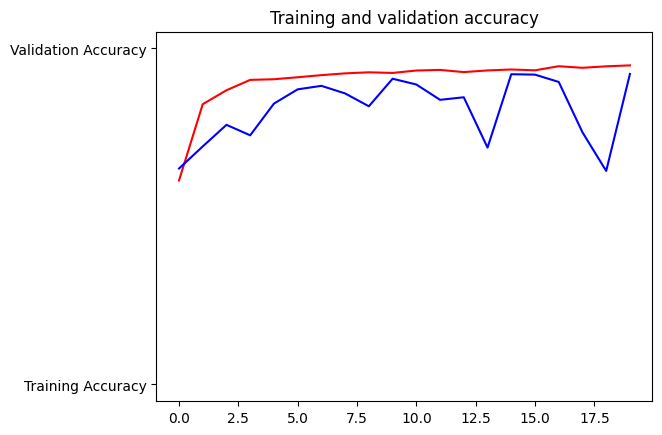

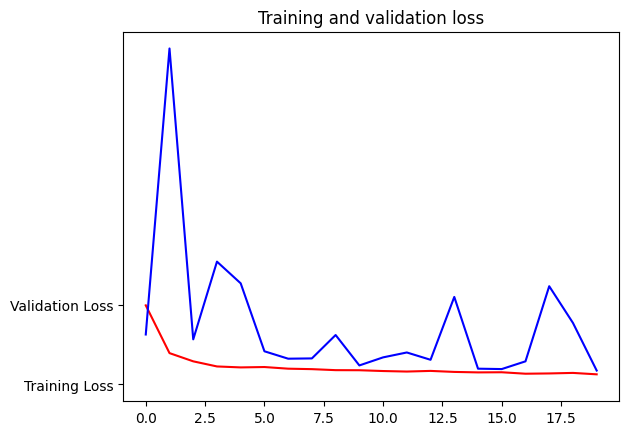

In [99]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

Here we can see that the validation loss and accuracy lines are much smoother for this model as compared to the earlier one. The loss values are lower, while the accuracy values are higher.

Hence, we can conclude that the model that uses transfer learning classifies cats and dogs much better than the CNN.


---
## Implementation of Pytorch
We would classify dogs and cats using pytorch framework with the help of Convolutional Neural Network

In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn.functional as F
import time
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [101]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

---
### Transforms
When you load in the data with ImageFolder, you'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc.

We'll also need to convert the images to PyTorch tensors with `transforms.ToTensor()`. Typically you'll combine these transforms into a pipeline with `transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

In [102]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(299),  # Inception input size is 299x299
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

---
### Loading Image Data
We'll use this dataset to train a neural network that can differentiate between cats and dogs. These days it doesn't seem like a big accomplishment, but five years ago it was a serious challenge for computer vision systems.

The easiest way to load image data is with `datasets.ImageFolder` from torchvision. In general you'll use ImageFolder like so:
`dataset = datasets.ImageFolder('path/to/data', transform=transform)`

where 'path/to/data' is the file path to the data directory and transform is a list of processing steps built with the transforms module from torchvision.

where each class has it's own directory (cat and dog) for the images. The images are then labeled with the class taken from the directory name. So here, the image 123.png would be loaded with the class label cat. You can download the dataset already structured like this from here. I've also split it into a training set and test set.

In [103]:
train_data=datasets.ImageFolder(root=("PetImages/testing"),transform=train_transform)

In [104]:
test_data=datasets.ImageFolder(root=("PetImages/training"),transform=test_transform)

####Displaying the class Name

In [105]:
class_names=train_data.classes
print(f"class names: {class_names[0]}, {class_names[1]}")

class names: cats, dogs


### Data Loaders
With the ImageFolder loaded, you have to pass it to a DataLoader. The DataLoader takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

In [106]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10)

In [107]:
len(train_data)

4999

In [108]:
len(test_data)

19999

## Building our own convolutional neural network (CNN)

In [113]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 73 * 73, 120)  # Adjusted input size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)
        self.fc4 = nn.Linear(20, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16 * 73 * 73)  # Adjusted input size
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)

        return F.log_softmax(X, dim=1)


In [114]:
CNNmodel=ConvolutionalNetwork().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(CNNmodel.parameters(),lr=0.001) #We would be using adam as an optimizer

In [115]:
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=85264, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=2, bias=True)
)

In [116]:
import time
start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=20
for i in range(epochs):
    trn_corr=0
    tst_corr=0
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1
        X_train, y_train = X_train.to(device), y_train.to(device)
        y_pred=CNNmodel(X_train)
        loss=criterion(y_pred,y_train)
        #true predictions
        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr

        #update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #print interim results
        if b%200==0:
            print(f"epoch: {i+1} loss: {loss.item()} batch: {b} accuracy: {trn_corr.item()*100/(10*b):7.3f}%")
    loss=loss.detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)


    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val=CNNmodel(X_test)
            loss=criterion(y_val,y_test)

            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr

        loss=loss.detach().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

epoch: 1 loss: 0.6153954267501831 batch: 200 accuracy:  54.050%
epoch: 1 loss: 0.6221628189086914 batch: 400 accuracy:  58.275%
epoch: 2 loss: 0.5470527410507202 batch: 200 accuracy:  68.400%
epoch: 2 loss: 0.7131949663162231 batch: 400 accuracy:  67.800%
epoch: 3 loss: 0.5947794914245605 batch: 200 accuracy:  72.800%
epoch: 3 loss: 0.572909951210022 batch: 400 accuracy:  71.350%
epoch: 4 loss: 0.5995899438858032 batch: 200 accuracy:  74.100%
epoch: 4 loss: 0.34021949768066406 batch: 400 accuracy:  74.325%
epoch: 5 loss: 0.7108480334281921 batch: 200 accuracy:  74.700%
epoch: 5 loss: 0.40809592604637146 batch: 400 accuracy:  74.925%
epoch: 6 loss: 0.6624706983566284 batch: 200 accuracy:  81.050%
epoch: 6 loss: 0.5217512249946594 batch: 400 accuracy:  79.325%
epoch: 7 loss: 0.5815243721008301 batch: 200 accuracy:  79.850%
epoch: 7 loss: 0.36897629499435425 batch: 400 accuracy:  79.900%
epoch: 8 loss: 0.32203441858291626 batch: 200 accuracy:  80.350%
epoch: 8 loss: 0.256634920835495 batc

After 20 epochs, the *loss* = 0.1587 and *accuracy* = 0.92850 (92.85%).

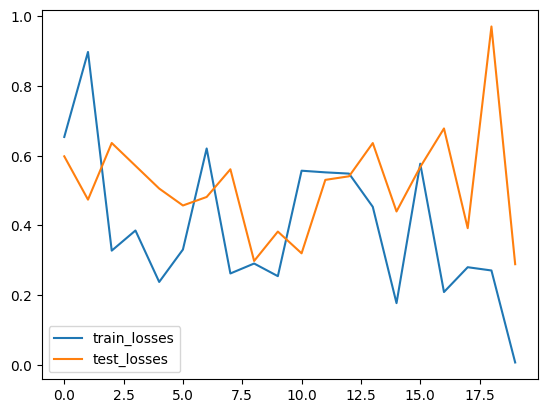

In [117]:
plt.plot(train_losses,label="train_losses")
plt.plot(test_losses,label="test_losses")
plt.legend()

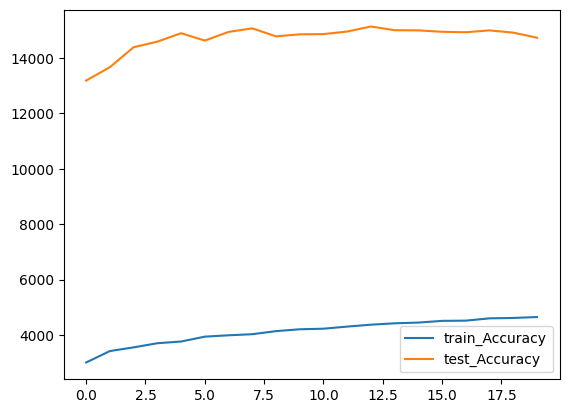

In [118]:
plt.plot(train_correct,label="train_Accuracy")
plt.plot(test_correct,label="test_Accuracy")
plt.legend()

### Transfer Learning

In [149]:
inception_model = models.inception_v3(pretrained=True)

In [155]:
for param in inception_model.parameters():
    param.requires_grad = False

In [156]:
inception_model.fc = nn.Sequential(
    nn.Linear(2048, 1024),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(1024, 2),
    nn.LogSoftmax(dim=1)
)

In [157]:
inception_model = inception_model.to(device)
inception_model 

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [158]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(inception_model.fc.parameters(), lr=0.001)

epoch: 1 loss: 0.02306709811091423 batch: 200 accuracy:  92.750%
epoch: 1 loss: 0.09200350940227509 batch: 400 accuracy:  92.825%
epoch: 2 loss: 0.4861685633659363 batch: 200 accuracy:  94.250%
epoch: 2 loss: 0.426440954208374 batch: 400 accuracy:  92.975%
epoch: 3 loss: 0.21434840559959412 batch: 200 accuracy:  91.550%
epoch: 3 loss: 0.019291119650006294 batch: 400 accuracy:  91.850%
epoch: 4 loss: 0.3157225549221039 batch: 200 accuracy:  93.300%
epoch: 4 loss: 0.027743706479668617 batch: 400 accuracy:  93.850%
epoch: 5 loss: 0.08194217830896378 batch: 200 accuracy:  94.000%
epoch: 5 loss: 0.12588286399841309 batch: 400 accuracy:  93.875%
epoch: 6 loss: 0.041484348475933075 batch: 200 accuracy:  92.950%
epoch: 6 loss: 0.03544224053621292 batch: 400 accuracy:  92.625%
epoch: 7 loss: 0.010251271538436413 batch: 200 accuracy:  94.450%
epoch: 7 loss: 0.270516961812973 batch: 400 accuracy:  93.950%
epoch: 8 loss: 0.17995387315750122 batch: 200 accuracy:  92.900%
epoch: 8 loss: 0.1605530530

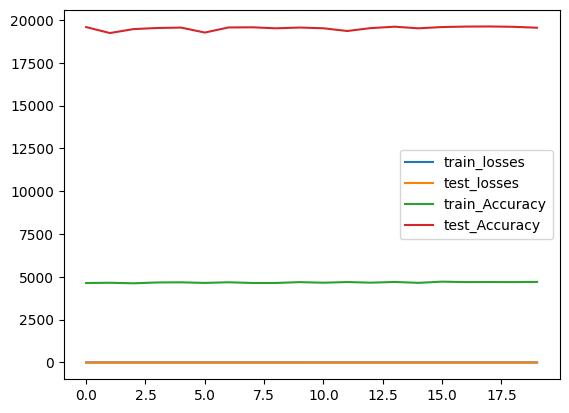

In [163]:
import time
start_time = time.time()
train_losses = []
test_losses = []
train_correct = []
test_correct = []
epochs = 20

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Training the model
    inception_model.train()
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs, _ = inception_model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass
        loss.backward()
        optimizer.step()

        # True predictions
        predicted = torch.max(outputs.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Print interim results
        if b % 200 == 0:
            print(f"epoch: {i+1} loss: {loss.item()} batch: {b} accuracy: {trn_corr.item()*100/(10*b):7.3f}%")

    loss = loss.detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Testing the model
    inception_model.eval()
    inception_model.eval()
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            X_test, y_test = X_test.to(device), y_test.to(device)

            # Forward pass
            outputs = inception_model(X_test)
            loss = criterion(outputs, y_test)

            # True predictions
            predicted = torch.max(outputs, 1)[1]
            batch_corr = (predicted == y_test).sum()
            tst_corr += batch_corr

    loss = loss.detach().numpy()
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")
plt.legend()

plt.plot(train_correct, label="train_Accuracy")
plt.plot(test_correct, label="test_Accuracy")
plt.legend()


After 20 epochs, the *loss* = 0.1277 and *accuracy* = 0.93950 (93.95%). 

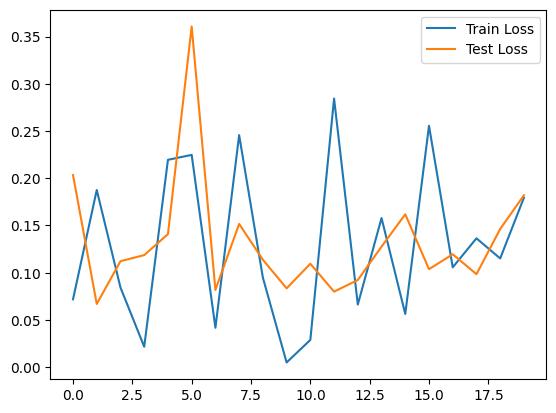

In [164]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

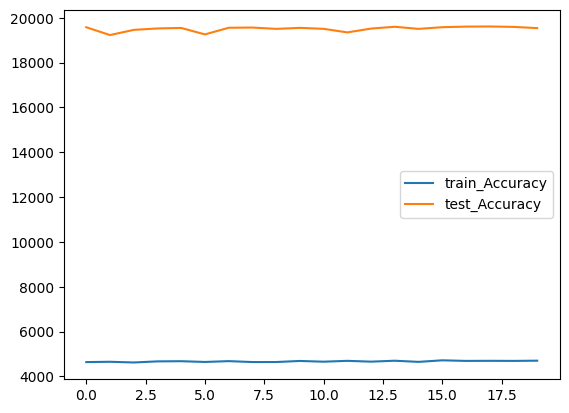

In [165]:
plt.plot(train_correct, label="train_Accuracy")
plt.plot(test_correct, label="test_Accuracy")
plt.legend()
plt.show()

----
## Compairing TencorFlow and Pytorch
Now we will compaire the both with the pretrained model which is used above

This is TensorFlow pre-trained model (Keras Inception_v3)

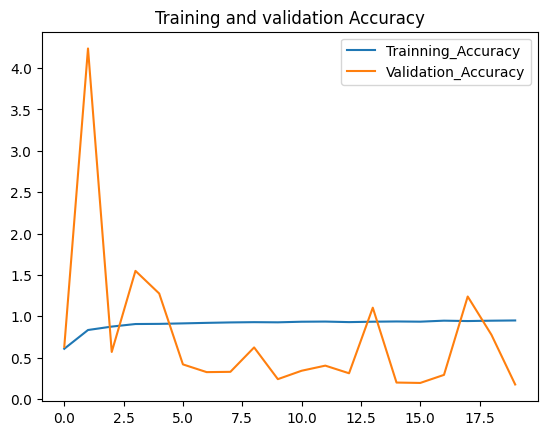

In [168]:
plt.plot(acc,label="Trainning_Accuracy")
plt.plot(val_loss,label="Validation_Accuracy")
plt.title('Training and validation Accuracy')

plt.legend()

 Where in this model the ***Loss= 0.1759*** and ***Accuracy =92.42% (0.9242)***



This is Pytorch pre-trained model (Inception_v3)

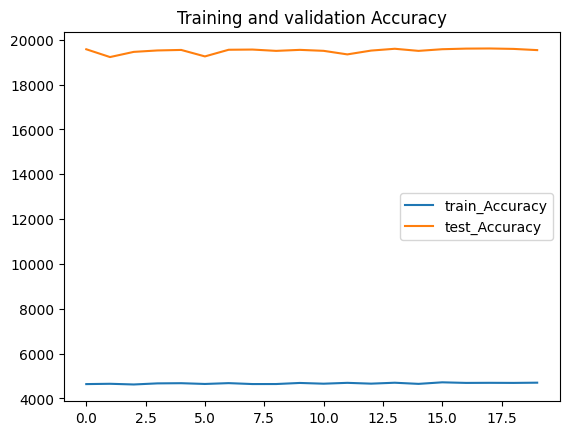

In [170]:
plt.plot(train_correct,label="train_Accuracy")
plt.plot(test_correct,label="test_Accuracy")
plt.title('Training and validation Accuracy')
plt.legend()

 Where in this model the ***Loss= 0.1277*** and ***Accuracy =93.95% (0.93950)***

# Conclution

Even though to train the model Pytorch takes more time and resourse compaired to TensorFlowm, Pytorch produceses the model with hight accuracy and less loss .If we consider time consuption Tensor flow is better and if we consider accuracy pytorch is better.